#### EXERCÍCIO 1

Accuracy: 0.8064516129032258


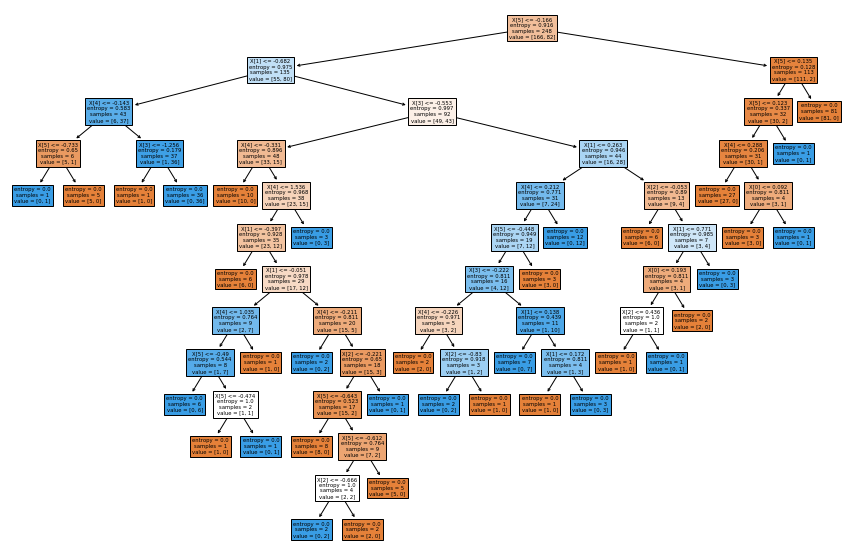

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn import tree
from sklearn.metrics import accuracy_score

model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train), filled=True) 
plt.show(True)

#### EXERCÍCIO 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

#chama o classificador
model = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=100)
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 
# calcula a acurácia do modelo
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)


Accuracy: 0.8225806451612904


#### EXERCÍCIO 3

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8064516129032258


#### EXERCÍCIO 4

In [4]:
wine = pd.read_csv('data/winequality-red.csv')
wine = wine.to_numpy()
nrow,ncol = wine.shape
y = wine[:,-1]
X = wine[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
models = [
        ('RandomForest | n=100', RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_jobs=1,
                oob_score=False, random_state=None, verbose=0,
                warm_start=False)),
    ('Entropy', tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)),
    ('Bagging | n=10', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=10)),
    ('Adabosting | n=10', AdaBoostClassifier(n_estimators=10,learning_rate=1, 
                         base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy'))),
    
]


for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))

Accuracy (RandomForest | n=100): 	0.66875
Accuracy (Entropy): 	0.578125
Accuracy (Bagging | n=10): 	0.65625
Accuracy (Adabosting | n=10): 	0.559375


#### EXERCICIO 5

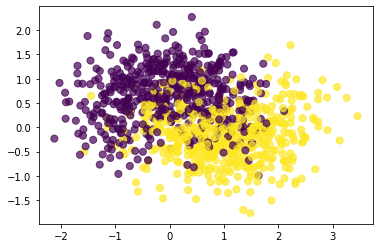

Accuracy (RandomForest | n=100): 	0.79
Accuracy (Entropy): 	0.765
Accuracy (Bagging | n=10): 	0.775
Accuracy (Adabosting | n=10): 	0.745


In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
np.random.seed(42) # define the seed (important to reproduce the results)
plt.figure(figsize=(6,4))

n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.5, random_state = 42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))